# Read SAS Files
The following data can be found here:
https://wwwn.cdc.gov/nchs/nhanes/

In [1]:
# Read SAS file
import pandas as pd

In [2]:
# NHANES 2001-2002 vaccination Immunization
nhanes0102_Vaccination = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/IMQ_B.XPT", format = "xport")

In [3]:
# NHANES 2001-2002 core antibody surface antigen
nhanes0102_BG = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/L02_B.XPT", format = "xport" )

In [4]:
# NHANES 2001-2002 surface antibody
nhanes0102_Antibody = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/L02HBS_B.XPT", format = "xport")

In [5]:
nhanes0102_Vaccination = nhanes0102_Vaccination[['SEQN','IMQ020']]

In [6]:
nhanes0102_BG = nhanes0102_BG[['SEQN','LBXHBC','LBDHBG']]

In [7]:
nhanes0102_Antibody

,SEQN,LBXHBS
0,9966.0,2.0
1,9967.0,2.0
2,9968.0,2.0
3,9969.0,2.0
4,9970.0,NaN
...,...,...
9593,20999.0,2.0
9594,21000.0,2.0
9595,21002.0,2.0
9596,21003.0,1.0


In [8]:
nhanes0102_No_vaccination = nhanes0102_Vaccination[(nhanes0102_Vaccination['IMQ020']==3.0) | (nhanes0102_Vaccination['IMQ020']==7.0) | (nhanes0102_Vaccination['IMQ020']==9.0)]

In [9]:
nhanes0102_No_vaccination

,SEQN,IMQ020
0,9966.0,3.0
1,9967.0,3.0
2,9968.0,3.0
3,9969.0,3.0
6,9972.0,3.0
...,...,...
11030,20996.0,3.0
11033,20999.0,3.0
11036,21002.0,9.0
11037,21003.0,9.0


In [10]:
nhanes0102_club_1 = pd.merge(nhanes0102_No_vaccination, nhanes0102_Antibody, on="SEQN", how = "left")

In [11]:
nhanes0102_club_2 = pd.merge(nhanes0102_club_1, nhanes0102_BG, on="SEQN", how = "left")

In [12]:
import pandas as pd
import pandas.io.sql as sqlio

In [13]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [14]:
from pandasql import sqldf

In [15]:
query = '''
SELECT SEQN, (CASE WHEN LBXHBC = 1.0 THEN 'Positive' WHEN LBXHBC = 2.0 THEN 'Negative' WHEN LBXHBC IS NULL THEN 'Missing' END) AS Core_Antibody,
(CASE WHEN LBDHBG = 1.0 THEN 'Positive' WHEN LBDHBG = 2.0 THEN 'Negative' WHEN LBDHBG IS NULL THEN 'Missing' END) AS Surface_Antigen,
(CASE WHEN LBXHBS = 1.0 THEN 'Positive' WHEN LBXHBS = 2.0 THEN 'Negative' WHEN LBXHBS IS NULL THEN 'Missing' END) AS Surface_Antibody,
(CASE WHEN IMQ020 = 3.0 THEN 'No Doses' WHEN IMQ020 = 7.0 THEN 'Refused' WHEN IMQ020 = 9.0 THEN "Don't know" END) AS Vaccination
FROM nhanes0102_club_2
'''

In [16]:
nhanes0102_final = sqldf(query)

In [17]:
nhanes0102_final[nhanes0102_final['Surface_Antigen'] == 'Positive']

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination
426,10775.0,Positive,Positive,Negative,No Doses
624,11168.0,Positive,Positive,Negative,No Doses
1928,13655.0,Positive,Positive,Negative,Don't know
2455,14649.0,Positive,Positive,Positive,Don't know
2761,15193.0,Positive,Positive,Negative,No Doses
3561,16599.0,Positive,Positive,Negative,No Doses
3974,17391.0,Positive,Positive,Negative,No Doses
4550,18412.0,Positive,Positive,Negative,No Doses
4753,18811.0,Positive,Positive,Positive,No Doses
5598,20369.0,Positive,Positive,Negative,No Doses


In [18]:
query2 = '''
SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, 
(CASE WHEN Surface_Antigen = 'Positive' THEN 'HBV Infection' WHEN (Surface_Antibody = 'Positive') THEN 'Vaccine Immunity' 
WHEN (Surface_Antigen = 'Negative' and Core_Antibody ='Negative' and Surface_Antibody ='Negative') THEN 'No Infection'
WHEN (Core_Antibody = 'Positive' and Surface_Antibody = 'Negative') THEN 'HBV Exposure' END) AS resp_2 
FROM nhanes0102_final
'''

In [19]:
nhanes0102_final_resp = sqldf(query2)

In [20]:
nhanes0102_final_resp[nhanes0102_final_resp['resp_2'].isna()]

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2
6,9975.0,Missing,Missing,Missing,No Doses,None
11,9981.0,Missing,Missing,Missing,No Doses,None
18,10003.0,Missing,Missing,Missing,No Doses,None
22,10011.0,Missing,Missing,Missing,Don't know,None
27,10019.0,Missing,Missing,Missing,No Doses,None
...,...,...,...,...,...,...
5911,20948.0,Missing,Missing,Missing,No Doses,None
5913,20952.0,Missing,Missing,Missing,Don't know,None
5916,20957.0,Missing,Missing,Missing,Don't know,None
5925,20976.0,Missing,Missing,Missing,No Doses,None


In [21]:
# NHANES 2017-2018 Hepatitis ever told
#nhanes9920_evertold = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/HEQ_H.XPT", format = "xport")

In [22]:
#nhanes1314_evertold = nhanes1314_evertold[['SEQN','HEQ010']]

In [23]:
# left outer join prior data with evertold
#nhanes1314_final_resp_comb = pd.merge(nhanes1314_final_resp, nhanes1314_evertold, on="SEQN", how = "left")

In [24]:
#nhanes1314_final_resp_comb

In [25]:
#query3 = '''
#SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, resp, HEQ010,
#(CASE WHEN resp IS NULL and HEQ010 = 1.0 THEN 'HBV Infection' WHEN resp IS NULL and HEQ010 = 2.0 THEN 'No Infection' ELSE resp END) AS resp_2
#FROM nhanes1314_final_resp_comb
#'''

In [26]:
#nhanes9920_final_resp_data = sqldf(query3)

In [27]:
nhanes0102_HBV = nhanes0102_final_resp[(nhanes0102_final_resp['resp_2']=='HBV Infection') | (nhanes0102_final_resp['resp_2']=='No Infection')]

In [28]:
nhanes0102_HBV

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2
0,9966.0,Negative,Negative,Negative,No Doses,No Infection
1,9967.0,Negative,Negative,Negative,No Doses,No Infection
2,9968.0,Negative,Negative,Negative,No Doses,No Infection
3,9969.0,Negative,Negative,Negative,No Doses,No Infection
4,9972.0,Negative,Negative,Negative,No Doses,No Infection
...,...,...,...,...,...,...
5935,20995.0,Negative,Negative,Negative,No Doses,No Infection
5936,20996.0,Negative,Negative,Negative,No Doses,No Infection
5937,20999.0,Negative,Negative,Negative,No Doses,No Infection
5938,21002.0,Negative,Negative,Negative,Don't know,No Infection


In [29]:
# NHANES 2017-2018 Demographic Variable
nhanes0102_Demographic = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/DEMO_B.XPT", format = "xport")

In [30]:
#changed columns 'RIDRETH1','DMQMILIT','DMDBORN', deleted 'DMQADFC' 
Demographic_Variables = ['SEQN','SDDSRVYR','RIAGENDR','RIDAGEYR','RIDRETH1','DMQMILIT','DMDBORN','DMDCITZN',
                        'DMDYRSUS','DMDEDUC2','DMDMARTL','WTINT2YR','WTMEC2YR','SDMVPSU','SDMVSTRA','INDFMPIR']

In [31]:
nhanes0102_Demographic = nhanes0102_Demographic[Demographic_Variables]

In [32]:
nhanes0102_HBV_Demo = pd.merge(nhanes0102_HBV, nhanes0102_Demographic, on="SEQN", how = "left")

In [33]:
nhanes0102_HBV_Demo

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,...,DMDBORN,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR
0,9966.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,39.0,3.0,...,1.0,1.0,NaN,4.0,3.0,85045.160060,91352.991726,2.0,22.0,2.93
1,9967.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,23.0,4.0,...,3.0,1.0,4.0,4.0,5.0,29465.456810,29456.680208,1.0,24.0,NaN
2,9968.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,84.0,3.0,...,1.0,1.0,NaN,2.0,2.0,20658.109377,27508.137821,2.0,20.0,0.68
3,9969.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,51.0,3.0,...,1.0,1.0,NaN,5.0,1.0,75077.431586,78536.315892,2.0,18.0,5.00
4,9972.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,44.0,3.0,...,1.0,1.0,NaN,3.0,1.0,93545.001858,93558.934760,1.0,26.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,20995.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,81.0,3.0,...,1.0,1.0,NaN,4.0,1.0,14760.619349,18042.559276,1.0,17.0,2.76
4097,20996.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,77.0,3.0,...,1.0,1.0,NaN,2.0,1.0,11870.275360,14213.310985,2.0,14.0,1.36
4098,20999.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,85.0,3.0,...,1.0,1.0,NaN,3.0,1.0,9490.963134,10127.416649,2.0,22.0,0.80
4099,21002.0,Negative,Negative,Negative,Don't know,No Infection,2.0,1.0,10.0,5.0,...,1.0,1.0,NaN,NaN,NaN,35628.840542,37077.391657,2.0,23.0,0.65


In [34]:
nhanes0102_Insurance = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/HIQ_B.XPT", format = "xport")

In [35]:
Insurance_Variables = ['SEQN','HID010','HID030A','HID030B','HID030C','HID030D','HID030E','HID040','HIQ210','HIQ220']

In [36]:
nhanes0102_Insurance = nhanes0102_Insurance[Insurance_Variables]

In [37]:
nhanes0102_HBV_Demo_Insurance = pd.merge(nhanes0102_HBV_Demo, nhanes0102_Insurance, on="SEQN", how = "left")

In [38]:
query4 = '''
SELECT *, 
(CASE WHEN HID010 = 2.0 THEN 1 ELSE 0 END) AS No_Insurance,
(CASE WHEN HID010 = 1.0 and HID030A = 1.0 THEN 1 ELSE 0 END) AS Private_Insurance,
(CASE WHEN HID010 = 1.0 and (HID030A IS NOT NULL OR HID030B IS NOT NULL OR HID030C IS NOT NULL OR HID030D IS NOT NULL OR 
HID030E IS NOT NULL) THEN 1 ELSE 0 END) Governement_Insurance
FROM nhanes0102_HBV_Demo_Insurance
'''

In [39]:
nhanes0102_HBV_Demo_Insurance = sqldf(query4)

In [40]:
nhanes0102_HBV_Demo_Insurance = nhanes0102_HBV_Demo_Insurance.drop(columns=['HID010','HID030A','HID030B','HID030C','HID030D','HID030E','HID040','HIQ210','HIQ220'])

In [41]:
nhanes0102_HBV_Demo_Insurance

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,...,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,No_Insurance,Private_Insurance,Governement_Insurance
0,9966.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,39.0,3.0,...,4.0,3.0,85045.160060,91352.991726,2.0,22.0,2.93,0,1,1
1,9967.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,23.0,4.0,...,4.0,5.0,29465.456810,29456.680208,1.0,24.0,NaN,0,1,1
2,9968.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,84.0,3.0,...,2.0,2.0,20658.109377,27508.137821,2.0,20.0,0.68,0,0,1
3,9969.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,51.0,3.0,...,5.0,1.0,75077.431586,78536.315892,2.0,18.0,5.00,0,1,1
4,9972.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,44.0,3.0,...,3.0,1.0,93545.001858,93558.934760,1.0,26.0,4.74,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,20995.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,81.0,3.0,...,4.0,1.0,14760.619349,18042.559276,1.0,17.0,2.76,0,0,1
4097,20996.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,77.0,3.0,...,2.0,1.0,11870.275360,14213.310985,2.0,14.0,1.36,0,1,1
4098,20999.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,85.0,3.0,...,3.0,1.0,9490.963134,10127.416649,2.0,22.0,0.80,0,0,1
4099,21002.0,Negative,Negative,Negative,Don't know,No Infection,2.0,1.0,10.0,5.0,...,NaN,NaN,35628.840542,37077.391657,2.0,23.0,0.65,0,0,1


In [42]:
#Alcohol use
nhanes0102_Alcohol = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/ALQ_B.XPT", format = "xport")

In [43]:
nhanes0102_Alcohol = nhanes0102_Alcohol[['SEQN','ALQ130']]

In [44]:
nhanes0102 = pd.merge(nhanes0102_HBV_Demo_Insurance, nhanes0102_Alcohol, on="SEQN", how = "left")

In [45]:
#Healthcare Visits
nhanes0102_Healthcare = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/HUQ_B.XPT", format = "xport")

In [46]:
nhanes0102_Healthcare = nhanes0102_Healthcare [['SEQN','HUQ050']]

In [47]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Healthcare, on="SEQN", how = "left")

In [48]:
#Dialysis
nhanes0102_Dialysis = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/KIQ_U_B.XPT", format = "xport")

In [49]:
nhanes0102_Dialysis = nhanes0102_Dialysis[['SEQN','KIQ025']]

In [50]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Dialysis, on="SEQN", how = "left")

In [51]:
#Liver Condition
nhanes0102_Liver_Condition = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/MCQ_B.XPT", format = "xport")

C:\Users\Kirtikanth\AppData\Local\Temp\ipykernel_18988\3071920369.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nhanes0102_Liver_Condition = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/MCQ_B.XPT", format = "xport")
C:\Users\Kirtikanth\AppData\Local\Temp\ipykernel_18988\3071920369.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nhanes0102_Liver_Condition = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/MCQ_B.XPT", format = "xport")
C:\Users\Kirtikanth\AppData\Local\Temp\ipykernel_18988\3071920369.py

In [52]:
nhanes0102_Liver_Condition = nhanes0102_Liver_Condition[['SEQN','MCQ160L']]

In [53]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Liver_Condition, on="SEQN", how = "left")

In [54]:
#Blood Transfusion
nhanes0102_Blood_Transfusion = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/MCQ_B.XPT", format = "xport")

C:\Users\Kirtikanth\AppData\Local\Temp\ipykernel_18988\2198096405.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nhanes0102_Blood_Transfusion = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/MCQ_B.XPT", format = "xport")
C:\Users\Kirtikanth\AppData\Local\Temp\ipykernel_18988\2198096405.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nhanes0102_Blood_Transfusion = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/MCQ_B.XPT", format = "xport")
C:\Users\Kirtikanth\AppData\Local\Temp\ipykernel_18988\219809640

In [55]:
nhanes0102_Blood_Transfusion = nhanes0102_Blood_Transfusion[['SEQN','MCQ092']]

In [56]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Blood_Transfusion, on="SEQN", how = "left")

In [57]:
#Healthcare Visits time
nhanes0102_Healthcare_time = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/HUQ_B.XPT", format = "xport")

In [58]:
nhanes0102_Healthcare_time = nhanes0102_Healthcare_time[['SEQN','HUQ060']]

In [59]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Healthcare_time, on="SEQN", how = "left")

In [60]:
#Hepatitis C
nhanes0102_Hepatitis_C = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/HCQ_B.XPT", format = "xport")

In [61]:
nhanes0102_Hepatitis_C = nhanes0102_Hepatitis_C[['SEQN']]

In [62]:
import numpy as np
nhanes0102_Hepatitis_C['Hepatitis_C'] = "Yes"

In [63]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Hepatitis_C, on="SEQN", how = "left")

In [64]:
Biochemistry_Variables = ['SEQN','LBXSATSI','LBDSALSI','LBXSASSI']

In [65]:
#Biochemistry_Variables
nhanes0102_Biochemistry_Variables = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/L40_B.XPT", format = "xport")

In [66]:
nhanes0102_Biochemistry_Variables = nhanes0102_Biochemistry_Variables[Biochemistry_Variables]

In [67]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Biochemistry_Variables, on="SEQN", how = "left")

In [68]:
#Platelet count
nhanes0102_Platelet_count= pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/L25_B.XPT", format = "xport")

In [69]:
nhanes0102_Platelet_count = nhanes0102_Platelet_count[['SEQN','LBXPLTSI']]

In [70]:
nhanes0102 = pd.merge(nhanes0102, nhanes0102_Platelet_count, on="SEQN", how = "left")

In [71]:
nhanes0102 = nhanes0102[nhanes0102['RIDAGEYR']>=18]

In [72]:
pd.set_option('display.max_columns', None)
nhanes0102.head()

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIT,DMDBORN,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,No_Insurance,Private_Insurance,Governement_Insurance,ALQ130,HUQ050,KIQ025,MCQ160L,MCQ092,HUQ060,Hepatitis_C,LBXSATSI,LBDSALSI,LBXSASSI,LBXPLTSI
0,9966.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,39.0,3.0,2.0,1.0,1.0,NaN,4.0,3.0,85045.160060,91352.991726,2.0,22.0,2.93,0,1,1,2.0,1.0,NaN,2.0,2.0,NaN,NaN,20.0,41.0,24.0,368.0
1,9967.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,23.0,4.0,2.0,3.0,1.0,4.0,4.0,5.0,29465.456810,29456.680208,1.0,24.0,NaN,0,1,1,1.0,2.0,NaN,2.0,2.0,NaN,NaN,54.0,45.0,36.0,247.0
2,9968.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,84.0,3.0,2.0,1.0,1.0,NaN,2.0,2.0,20658.109377,27508.137821,2.0,20.0,0.68,0,0,1,1.0,2.0,NaN,2.0,2.0,NaN,NaN,12.0,38.0,19.0,305.0
3,9969.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,51.0,3.0,2.0,1.0,1.0,NaN,5.0,1.0,75077.431586,78536.315892,2.0,18.0,5.00,0,1,1,2.0,3.0,NaN,2.0,2.0,NaN,NaN,21.0,46.0,25.0,239.0
4,9972.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,44.0,3.0,2.0,1.0,1.0,NaN,3.0,1.0,93545.001858,93558.934760,1.0,26.0,4.74,0,1,1,NaN,1.0,NaN,2.0,2.0,NaN,NaN,65.0,43.0,49.0,318.0


In [73]:
nhanes0102 = nhanes0102.rename(columns = {'SEQN':'Respondent_sequence_number',
                            'SDDSRVYR':'Data_release_cycle',
                            'RIAGENDR':'Gender',
                            'RIDAGEYR':'Age',
                            'RIDRETH1':'Race_Ethnicity',
                            'DMQMILIT':'Veteran_Status',
                            'DMDBORN':'Country_of_birth',
                            'DMDCITZN':'Citizenship_status',
                            'DMDYRSUS':'Length_of_time_in_US',
                            'DMDEDUC2':'Education_level',
                            'DMDMARTL':'Marital_status',
                            'WTINT2YR':'Two_year_interview_weight',
                            'WTMEC2YR':'Two_year_MEC_weight',
                            'SDMVPSU':'Masked_variance_PSU',
                            'SDMVSTRA':'Masked_variance_stratum',
                            'INDFMPIR':'Ratio_income_poverty',
                            'ALQ130':'Alcohol_1_year',
                            'HUQ050':'Health_care_1_year',
                            'KIQ025':'Dialysis_1_year',
                            'MCQ160L':'liver_condition',
                            'MCQ092':'Blood_Transfusion',
                            'HUQ060':'Last_Healthcare_Visit',
                            'Hepatitis_C':'Hepatitis_C',
                            'LBXSATSI':'ALT',
                            'LBDSALSI':'Albumin',
                            'LBXSASSI':'AST',
                            'LBXPLTSI':'Platelet_Count'})

In [74]:
nhanes0102[nhanes0102['resp_2']=='HBV Infection'].shape

(10, 35)

In [75]:
nhanes0102

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,Two_year_interview_weight,Two_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C,ALT,Albumin,AST,Platelet_Count
0,9966.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,39.0,3.0,2.0,1.0,1.0,NaN,4.0,3.0,85045.160060,91352.991726,2.0,22.0,2.93,0,1,1,2.0,1.000000e+00,NaN,2.0,2.0,NaN,NaN,20.0,41.0,24.0,368.0
1,9967.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,23.0,4.0,2.0,3.0,1.0,4.0,4.0,5.0,29465.456810,29456.680208,1.0,24.0,NaN,0,1,1,1.0,2.000000e+00,NaN,2.0,2.0,NaN,NaN,54.0,45.0,36.0,247.0
2,9968.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,84.0,3.0,2.0,1.0,1.0,NaN,2.0,2.0,20658.109377,27508.137821,2.0,20.0,0.68,0,0,1,1.0,2.000000e+00,NaN,2.0,2.0,NaN,NaN,12.0,38.0,19.0,305.0
3,9969.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,51.0,3.0,2.0,1.0,1.0,NaN,5.0,1.0,75077.431586,78536.315892,2.0,18.0,5.00,0,1,1,2.0,3.000000e+00,NaN,2.0,2.0,NaN,NaN,21.0,46.0,25.0,239.0
4,9972.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,44.0,3.0,2.0,1.0,1.0,NaN,3.0,1.0,93545.001858,93558.934760,1.0,26.0,4.74,0,1,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,NaN,65.0,43.0,49.0,318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,20994.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,67.0,4.0,2.0,1.0,1.0,NaN,4.0,1.0,9859.996659,13039.051383,2.0,26.0,5.00,0,1,1,1.0,5.397605e-79,NaN,2.0,2.0,2.0,NaN,20.0,41.0,19.0,373.0
4096,20995.0,Negative,Negative,Negative,No Doses,No Infection,2.0,2.0,81.0,3.0,2.0,1.0,1.0,NaN,4.0,1.0,14760.619349,18042.559276,1.0,17.0,2.76,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,NaN,23.0,47.0,22.0,314.0
4097,20996.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,77.0,3.0,2.0,1.0,1.0,NaN,2.0,1.0,11870.275360,14213.310985,2.0,14.0,1.36,0,1,1,NaN,3.000000e+00,NaN,2.0,1.0,NaN,NaN,13.0,42.0,18.0,273.0
4098,20999.0,Negative,Negative,Negative,No Doses,No Infection,2.0,1.0,85.0,3.0,1.0,1.0,1.0,NaN,3.0,1.0,9490.963134,10127.416649,2.0,22.0,0.80,0,0,1,NaN,5.397605e-79,NaN,2.0,2.0,3.0,NaN,18.0,42.0,25.0,227.0


In [76]:
import numpy as np
column_mapping = {
    'Gender':{1.0:"male", 2.0:"Female", np.nan:"missing"},
    'Race_Ethnicity':{1.0:"Mexican American",2.0:"Other Hispanic",3.0:"Non-Hispanic White",4.0:"Non-Hispanic Black",6.0:"Non-Hispanic Asian",7.0:"Other Race - Including Multi-Racial"},
    'Veteran_Status':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Foreign_country':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0: "Don't know", np.nan:"missing"},
    'Country_of_birth':{1.0:"US", 2.0:"Other",3.0:"Other",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Citizenship_status':{1.0:"Citizen",2.0:"Not a citizen",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Length_of_time_in_US':{1.0:"Less than 1 year",2.0:"1-5",3.0:"5-10",4.0:"10-15",5.0:"15-20",6.0:"20-30",7.0:"30-40",8.0:"40-50",9.0:"50 or more",77.0:"Refused",88.0:"Could not determine",99.0:"Don't know",np.nan:"missing"},
    'Education_level':{1.0:"Less Than 9th Grade",2.0:"9-12th Grade",3.0:"High School Grad/GED or Equivalent",4.0:"Some College or AA degree",5.0:"College Graduate or above",7.0:"Refused",9.0:"Don't Know",np.nan:"missing"},
    'Marital_status':{1.0:"Married",2.0:"Widowed",3.0:"Divorced",4.0:"Separated",5.0:"Never married",6.0:"Living with partner",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'HH_Country_of_Birth':{1.0:"US", 2.0:"Other",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Health_care_1_year':{5.397605e-79:"None",1.0:"1",2.0:"2 to 3",3.0:"4 to 9",4.0:"10 to 12",5.0:"13 or more",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Dialysis_1_year':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'liver_condition':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Blood_Transfusion':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Last_Healthcare_Visit':{1.0:"6 months or less",2.0:"More than 6 months, but not more than 1 year ago",3.0:"More than 1 year, but not more than 3 years ago",4.0:"More than 3 years",5.0:"Never",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Hepatitis_C':{"Yes":"Yes",np.nan:"No"}
}

In [77]:

nhanes0102.replace(column_mapping,inplace=True)


In [78]:

for i in list(nhanes0102.columns):
    print(i, ":", nhanes0102[(nhanes0102[i]=='missing') | (nhanes0102[i].isna())].shape[0]*100.0/nhanes0102.shape[0])


Respondent_sequence_number : 0.0
Core_Antibody : 0.0
Surface_Antigen : 0.0
Surface_Antibody : 0.0
Vaccination : 0.0
resp_2 : 0.0
Data_release_cycle : 0.0
Gender : 0.0
Age : 0.0
Race_Ethnicity : 0.0
Veteran_Status : 0.027525461051472612
Country_of_birth : 0.055050922102945224
Citizenship_status : 0.027525461051472612
Length_of_time_in_US : 79.02559867877787
Education_level : 5.6702449766033585
Marital_status : 0.027525461051472612
Two_year_interview_weight : 0.0
Two_year_MEC_weight : 0.0
Masked_variance_PSU : 0.0
Masked_variance_stratum : 0.0
Ratio_income_poverty : 6.496008808147536
No_Insurance : 0.0
Private_Insurance : 0.0
Governement_Insurance : 0.0
Alcohol_1_year : 42.88466831819433
Health_care_1_year : 0.0
Dialysis_1_year : 97.63281034957336
liver_condition : 5.642719515551885
Blood_Transfusion : 0.0
Last_Healthcare_Visit : 81.9157720891825
Hepatitis_C : 0.0
ALT : 0.495458298926507
Albumin : 0.495458298926507
AST : 0.495458298926507
Platelet_Count : 0.027525461051472612


In [79]:

#Remove Last Healthcare Visits
#Remove Length_of_time_in_Us
#Remove Dialysis_1_year

nhanes0102 = nhanes0102.drop(columns=['Dialysis_1_year','Last_Healthcare_Visit','Length_of_time_in_US'])


In [80]:
import matplotlib.pyplot as plt
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count', 'Alcohol_1_year', 'Ratio_income_poverty']


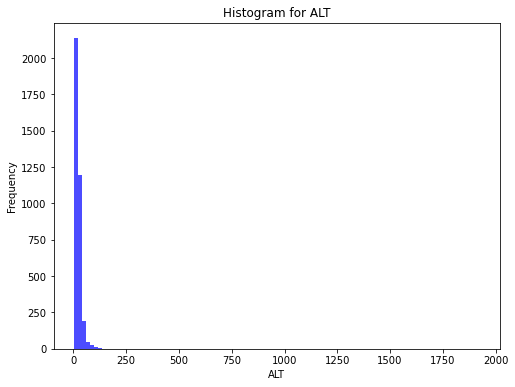

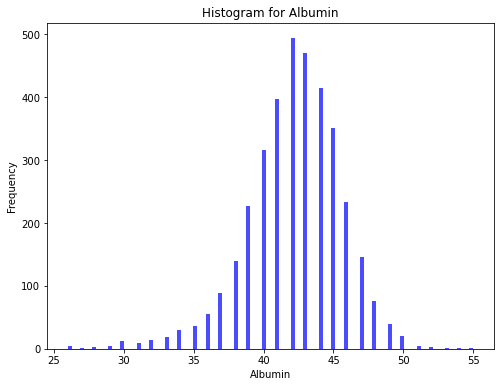

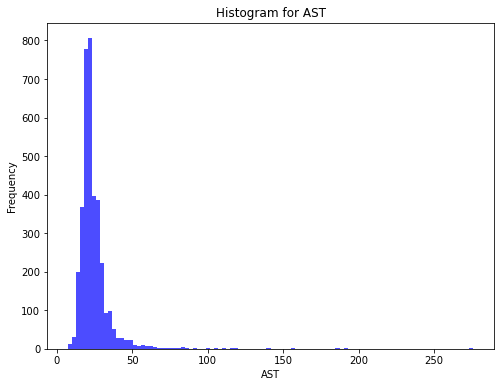

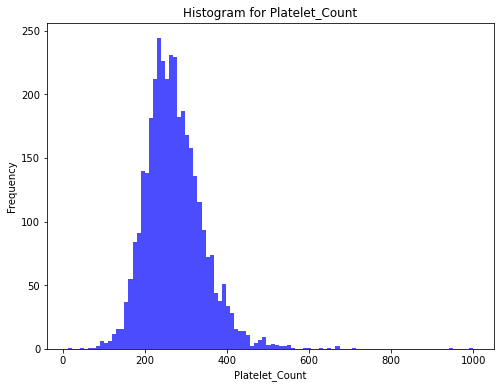

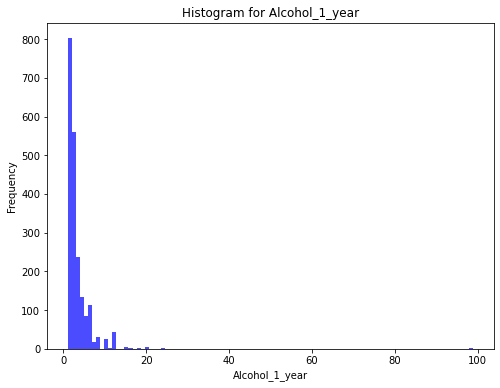

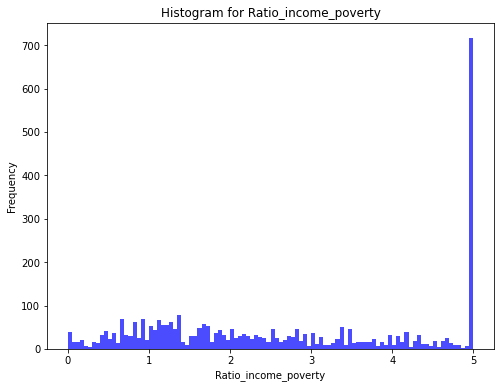

In [81]:

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(nhanes0102[~nhanes0102[column].isna()][column], bins=100, color='blue', alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [82]:


#Impute ALT, AST, PLT, PST with medians
#Impute income poverty ratio with PSU weighted means
#Impute Alcohol 1 year with weighted means
#Delete rows where Categorical features are missing

# Deleting records where categorical columns have missing values
categorical_columns = ['Education_level','Marital_status','liver_condition']


In [83]:

# Drop rows with missing values in specified categorical columns
nhanes0102 = nhanes0102.dropna(subset=categorical_columns)


In [84]:

#Imputing biochemistry variables
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count']


In [85]:

# Impute missing values with median
for column in continuous_columns:
    median_value = nhanes0102[column].median()
    nhanes0102[column].fillna(median_value, inplace=True)


In [86]:

#Imputing alcohol_1_year
alcohol_column = 'Alcohol_1_year'
weights_column = 'Two_year_interview_weight'  


In [87]:

# Calculate the weighted mean for Alcohol_1_year
weighted_mean = (nhanes0102[alcohol_column] * nhanes0102[weights_column]).sum() / nhanes0102[weights_column].sum()


In [88]:

# Impute missing values with the weighted mean for Alcohol_1_year
nhanes0102[alcohol_column].fillna(weighted_mean, inplace=True)



In [89]:
nhanes0102.columns


Index(['Respondent_sequence_number', 'Core_Antibody', 'Surface_Antigen',
       'Surface_Antibody', 'Vaccination', 'resp_2', 'Data_release_cycle',
       'Gender', 'Age', 'Race_Ethnicity', 'Veteran_Status', 'Country_of_birth',
       'Citizenship_status', 'Education_level', 'Marital_status',
       'Two_year_interview_weight', 'Two_year_MEC_weight',
       'Masked_variance_PSU', 'Masked_variance_stratum',
       'Ratio_income_poverty', 'No_Insurance', 'Private_Insurance',
       'Governement_Insurance', 'Alcohol_1_year', 'Health_care_1_year',
       'liver_condition', 'Blood_Transfusion', 'Hepatitis_C', 'ALT', 'Albumin',
       'AST', 'Platelet_Count'],
      dtype='object')

In [90]:

nhanes0102['concat'] = nhanes0102['Masked_variance_stratum'].astype(str) + '_' + nhanes0102['Masked_variance_PSU'].astype(str)



In [91]:
nhanes0102['product'] = nhanes0102['Ratio_income_poverty']*nhanes0102['Two_year_interview_weight']
nhanes0102.dtypes

Respondent_sequence_number    float64
Core_Antibody                  object
Surface_Antigen                object
Surface_Antibody               object
Vaccination                    object
resp_2                         object
Data_release_cycle            float64
Gender                         object
Age                           float64
Race_Ethnicity                 object
Veteran_Status                 object
Country_of_birth               object
Citizenship_status             object
Education_level                object
Marital_status                 object
Two_year_interview_weight     float64
Two_year_MEC_weight           float64
Masked_variance_PSU           float64
Masked_variance_stratum       float64
Ratio_income_poverty          float64
No_Insurance                    int64
Private_Insurance               int64
Governement_Insurance           int64
Alcohol_1_year                float64
Health_care_1_year             object
liver_condition                object
Blood_Transf

In [92]:
nhanes0102_temp = nhanes0102.groupby('concat').sum()['product'].reset_index()

In [93]:
nhanes0102_temp_2 = nhanes0102.groupby('concat').sum()['Two_year_interview_weight'].reset_index()

In [94]:
nhanes0102_temp_3  = pd.merge(nhanes0102_temp, nhanes0102_temp_2, on="concat", how = "left")

In [95]:
nhanes0102_temp_3['rip'] = nhanes0102_temp_3['product']/nhanes0102_temp_3['Two_year_interview_weight']

In [96]:
nhanes0102_temp_4 = nhanes0102_temp_3[['concat','rip']]

In [97]:
nhanes0102 = pd.merge(nhanes0102,nhanes0102_temp_4, on='concat', how='left')

In [98]:
# Fill missing values in col_to_fill with mapping_value
nhanes0102['Ratio_income_poverty'] = nhanes0102['Ratio_income_poverty'].fillna(nhanes0102['rip'])

In [99]:
nhanes0102 = nhanes0102.drop(columns=['product','rip'])

In [100]:
for i in list(nhanes0102.columns):
    print(i, ":", nhanes0102[(nhanes0102[i]=='missing') | (nhanes0102[i].isna())].shape[0]*100.0/nhanes0102.shape[0])

Respondent_sequence_number : 0.0
Core_Antibody : 0.0
Surface_Antigen : 0.0
Surface_Antibody : 0.0
Vaccination : 0.0
resp_2 : 0.0
Data_release_cycle : 0.0
Gender : 0.0
Age : 0.0
Race_Ethnicity : 0.0
Veteran_Status : 0.027525461051472612
Country_of_birth : 0.055050922102945224
Citizenship_status : 0.027525461051472612
Education_level : 5.6702449766033585
Marital_status : 0.027525461051472612
Two_year_interview_weight : 0.0
Two_year_MEC_weight : 0.0
Masked_variance_PSU : 0.0
Masked_variance_stratum : 0.0
Ratio_income_poverty : 0.0
No_Insurance : 0.0
Private_Insurance : 0.0
Governement_Insurance : 0.0
Alcohol_1_year : 0.0
Health_care_1_year : 0.0
liver_condition : 5.642719515551885
Blood_Transfusion : 0.0
Hepatitis_C : 0.0
ALT : 0.0
Albumin : 0.0
AST : 0.0
Platelet_Count : 0.0
concat : 0.0


In [102]:
# Replace "missing" with NaN
nhanes0102.replace('missing', np.nan, inplace=True)

# Drop rows with any missing values
nhanes0102 = nhanes0102.dropna()

# Display the cleaned DataFrame
nhanes0102.shape

(3426, 33)